<a href="https://colab.research.google.com/github/awhooshingwind/colab_notebooks/blob/main/diffyqs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.integrate import solve_ivp

sym.init_printing()

##### Part I, Comparing with Experiments

Consider the following spring mass system illustrated in Figure 1.

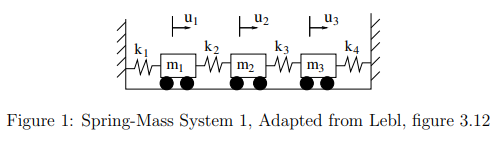

Figure 1: Spring-Mass System 1, Adapted from Lebl, figure 3.12

The circles (wheels) indicate that that the masses experience negligible friction.


In [3]:
# Define Parameters, Mass and Stiffness Matrices (M, K)
m1, m2, m3 = 1, 1, 1
k1, k2, k3, k4 = 1, 1, 1, 1

M = [m1, m2, m3]
M = np.diag(M)

K = [
    [-(k1 + k2), k2, 0],
     [k2, -(k2+k3), k3],
     [0, k3, -(k3+k4)]
]
K = np.array(K)
K = K*-1 # flip sign of K (+eig, real omega)

minv = linalg.inv(M)
A = minv @ K

print(M,'\n', K)

[[1 0 0]
 [0 1 0]
 [0 0 1]] 
 [[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]


In [4]:
def spr_mass(t, u):
  x1,v1,x2,v2,x3,v3 = u
  a1 = -(k1+k2)/m1*x1 + k2/m1*x2
  a2 = k2/m2*x1 - (k2+k3)/m2*x2 + k3/m2*x3
  a3 = k3/m3*x2 - (k3+k4)/m3*x3

  return [v1, a1, v2, a2, v3, a3]

##### Part 2, Earthquake!

3-story building modeled by a 3 mass, 3 spring system

In [253]:
# Define Parameters, Mass and Stiffness Matrices (M, K)
m1, m2, m3 = 1, 1, 1
k1, k2, k3 = 1, 1, 1

M = [m1, m2, m3]
M = np.diag(M)

K = [
     [-(k1+k2)/m1, +k2/m1, 0],
     [k2/m2, -(k2+k3)/m2, +k3/m2],
     [0, k2/m3, -(k2+k3)/m3]
]
K = np.array(K)

In [254]:
def spr_mass(t, u):
  x1,v1,x2,v2,x3,v3 = u
  a1 = -(k1+k2)/m1*x1 + k2/m1*x2
  a2 = k2/m2*x1 - (k2+k3)/m2*x2 + k3/m2*x3
  a3 = k2/m3*x2 - (k2+k3)/m3*x3

  return [v1, a1, v2, a2, v3, a3]

#### SciPy IVP

In [19]:
# U-vector of initial condtions (x0, v0)
U = [1, 0, 1, 0, 1, 0] # mode 1, all move same direction
U = [1, 0, 0, 0, -1, 0] # mode 2, outer masses move opposing directions, center stationary
U = [1, 0, -1, 0, 1, 0] # mode 3, outer masses same direction, center mass opposes one

# U = np.random.uniform(-1, 1, 6) # random ICs between -1, 1
U

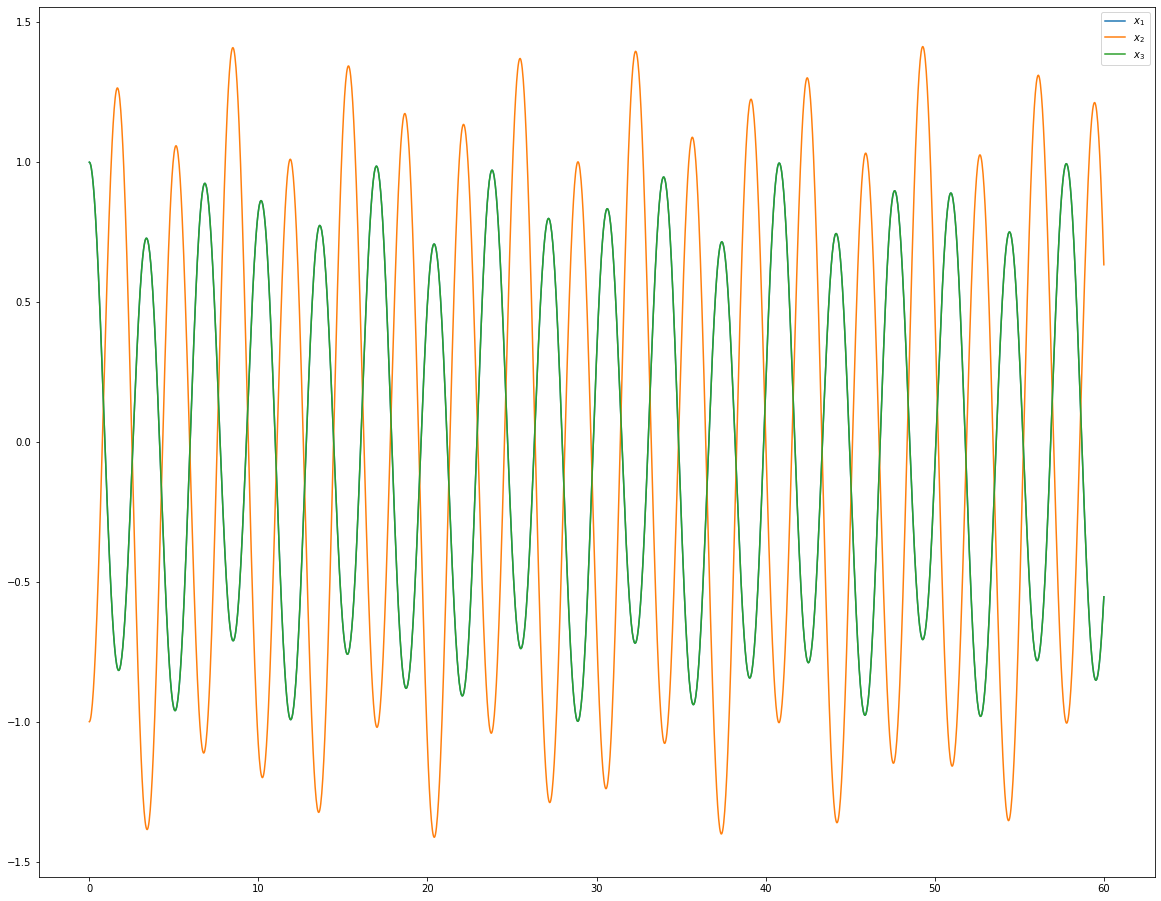

In [20]:
t = np.linspace(0, 60, 2000)
sol = solve_ivp(spr_mass, [t.min(), t.max()], y0=U, dense_output=True)
# display(sol)
z = sol.sol(t)
x1,v1,x2,v2,x3,v3 = z
fig = plt.figure(figsize=(20,16))
plt.plot(t, x1, t, x2, t, x3)
plt.legend(["$x_1$", "$x_2$", "$x_3$"])

#### Symbolic Eigenvalue/Eigenvector Soln (sympy)



In [49]:
lamda, v = linalg.eig(K, M)
lamda, v
# vec_vals = zip(lamda, v)
# for v in vec_vals:
#   print(v)

(array([0.58578644+0.j, 2.        +0.j, 3.41421356+0.j]),
 array([[ 5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
        [ 7.07106781e-01,  1.83880688e-16, -7.07106781e-01],
        [ 5.00000000e-01,  7.07106781e-01,  5.00000000e-01]]))

In [50]:
# initial conditions (A: x0, B: v0)
A = [-1, 1, -1]
B = [0, 0 , 0]

# sqrt(lambda) = omega
w = [np.sqrt(l) for l in lamda]
[print(f'w/2pi = {w/2*np.pi:.4f}') for w in w]

w/2pi = 1.2022+0.0000j
w/2pi = 2.2214+0.0000j
w/2pi = 2.9025+0.0000j


[None, None, None]

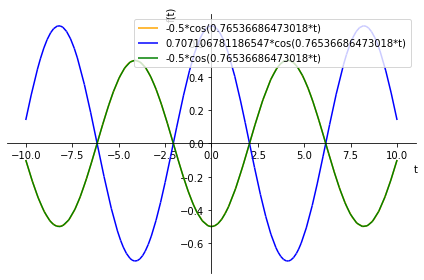

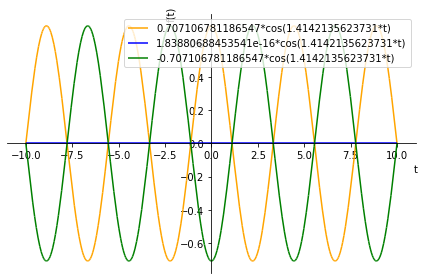

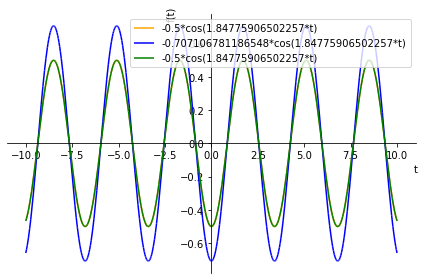

In [51]:
t = sym.symbols('t')

yn = [A[i]*sym.cos(w[i]*t)*v[i] + B[i]*sym.sin(w[i]*t)*v[i] for i in range(len(A))]
from sympy.plotting import plot

for y in yn:
  p1 = plot(y[0], line_color='orange', label=y[0],show=False, legend=True)
  p2 = plot(y[1], line_color='blue', label=y[1], show=False)
  p1.extend(p2)
  p2 = plot(y[2], line_color='green',label=y[2], show=False)
  p1.extend(p2)
  p1.show()